In [1]:
## Bring in needed mods
import numpy as np, pandas as pd, scipy.stats as ss, glob, seaborn as sns
from Bio import SeqIO
from matplotlib import pyplot as plt
%matplotlib inline

## Load in my mods
import sys, os
sys.path.insert(0, '/home/croth/QTL-functions/SCRIPTS/')
import qtlfunctions as qtlfun, snpy

In [2]:
## Set reference and gff paths
refpath = '/home/croth/Documents/DirtyDozen/REF/FungiDB-46_CneoformansH99_Genome.fasta'
gffpath = '../../REF/FungiDB-46_CneoformansH99.gff.gz'

In [3]:
## Set parent names and gather PMY numbers
parents = ['Bt22','Ftc555-1']
parent_pmy = ['PMY2649','PMY2650']
parent_pmy

['PMY2649', 'PMY2650']

In [4]:
## Set QTL to examine
chrom = 8
genopath = '../../GENOTYPE/CSV/GT/CP003827.1_Chr%s_QTL_genotypes.csv.gz'%chrom
depthpath = '../../GENOTYPE/CSV/DP/CP003827.1_Chr%s_QTL_depths.csv.gz'%chrom
ratiopath = '../../GENOTYPE/CSV/AF/CP003827.1_Chr%s_QTL_allele_ratios.csv.gz'%chrom
infopath = '../../GENOTYPE/CSV/INFO/CP003827.1_Chr%s_QTL_info_cols.csv.gz'%chrom
phenopath = '../../PHENOTYPE/Chromosome%s_genotypexphenotype.csv.gz'%chrom

In [5]:
## Load in genotype data
gts = pd.read_csv(genopath,index_col=0)
samples = sorted(gts.columns.tolist())
gts.shape

(1160, 307)

In [6]:
## Load in ratio data
ads = pd.read_csv(ratiopath,index_col=0)
ads.shape

(1160, 307)

In [7]:
## Load in info data
info = pd.read_csv(infopath,index_col=0)
info.head()

,Seqid,Pos,Qual,Nalleles,Alleles,Maxlen,Minlen,Type,Callrate,MAF
78,CP003827.1,660129,155889.000000,1,TATCATTTTTGA.TATCGACTTTTGA,13,12,ins,0.993485,0.000000
95,CP003827.1,660175,152614.000000,1,TCTCC.TCTTC,5,5,MNP,1.000000,0.000000
96,CP003827.1,660182,153758.000000,1,ATCG.ATGG,4,4,MNP,1.000000,0.000000
106,CP003827.1,660202,150334.000000,1,CTTC.CTTG,4,4,MNP,1.000000,0.000000
132,CP003827.1,660239,0.207309,2,T.A.C,1,1,SNP,1.000000,0.996743


In [8]:
## Load in depth data
dps = pd.read_csv(depthpath,index_col=0)
dps.head()

,PMY2940,PMY2936,PMY2934,PMY2932,PMY2931,PMY2929,PMY2927,PMY2926,PMY2925,PMY2924,...,PMY2721,PMY2865,PMY2869,PMY2866,PMY2567,PMY2868,PMY2659,PMY2879,PMY2882,PMY2887
78,12.0,17.0,11.0,3.0,14.0,11.0,4.0,13.0,11.0,14.0,...,9.0,13.0,19.0,14.0,8.0,22.0,0.0,9.0,7.0,19.0
95,12.0,19.0,11.0,5.0,13.0,12.0,4.0,15.0,12.0,16.0,...,8.0,11.0,24.0,18.0,8.0,16.0,2.0,13.0,2.0,19.0
96,13.0,18.0,10.0,5.0,14.0,12.0,5.0,16.0,12.0,18.0,...,9.0,10.0,22.0,17.0,7.0,14.0,2.0,11.0,4.0,20.0
106,15.0,15.0,10.0,5.0,12.0,10.0,8.0,19.0,11.0,13.0,...,10.0,7.0,20.0,18.0,7.0,15.0,6.0,15.0,4.0,22.0
132,13.0,16.0,10.0,6.0,11.0,11.0,9.0,18.0,12.0,25.0,...,11.0,8.0,13.0,19.0,13.0,22.0,16.0,14.0,6.0,21.0


In [9]:
## Find the depth across sites per segregant
avecovx = pd.DataFrame(dps[samples].mean(),columns=['Covx']).sort_values('Covx')
avecovx.tail()

,Covx
PMY2800,71.921552
PMY2902,76.191379
PMY2781,76.794828
PMY2685,77.060345
PMY2881,78.753448


In [10]:
avecovx.shape

(307, 1)

In [11]:
## Load in phenotype data
chr8 = pd.read_csv(phenopath)
chr8 = chr8[(chr8.Strain.isin(samples))]
chr8['Covx'] = avecovx.loc[chr8.Strain].values
chr8.head()

,Strain,Phenotype,Genotype,Covx
0,PMY2771,2.299995,1.0,21.348276
1,PMY2768,2.329028,1.0,41.738793
2,PMY2759,2.890317,0.0,13.714655
3,PMY2788,2.963435,1.0,9.257759
4,PMY2773,3.124725,1.0,34.490517


In [12]:
import seaborn as sns

In [13]:
allcalled = gts.T[((gts.isna().sum()) == 0)].T

In [14]:
allcalledsegs = allcalled.columns

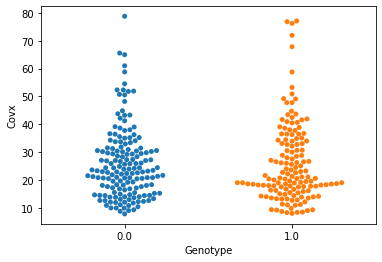

In [72]:
sns.swarmplot(x='Genotype',y='Covx',data=chr8);

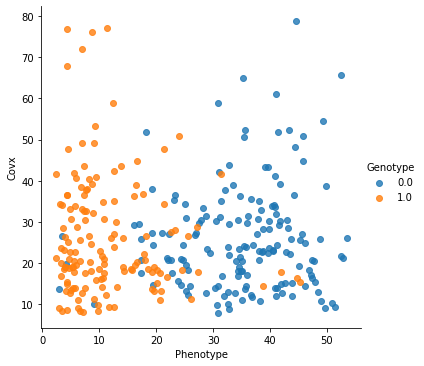

In [15]:
sns.lmplot(x='Phenotype',y='Covx',hue='Genotype',
           data=chr8,ci=False,fit_reg=False );

In [139]:
sc = 6
covxf = 30
phenof = 35
Bt22_segs = list(chr8[(chr8.Genotype==0) & 
                 (chr8.Phenotype>phenof) &
                 (chr8.Covx>covxf)
                ].Strain.values[-sc:])

Ftc555_segs = list(chr8[(chr8.Genotype==1) & 
                 (chr8.Phenotype>5) &
                 (chr8.Covx>covxf)
                ].Strain.values[-sc:])

assert len(Bt22_segs)+len(Ftc555_segs) == 2*sc, "We are missing strains"

In [133]:
## Find genes that overlap each variant
infoo = snpy.geneoverlap(info,gffpath)
infoo.head()

,Seqid,Pos,Qual,Nalleles,Alleles,Maxlen,Minlen,Type,Callrate,MAF,Strand,Gene,Description,Ref,Alt
78,CP003827.1,660129,155889.000000,1,TATCATTTTTGA.TATCGACTTTTGA,13,12,ins,0.993485,0.000000,1,CNAG_03327,hypothetical protein,TATCATTTTTGA,TATCATTTTTGA.TATCGACTTTTGA
95,CP003827.1,660175,152614.000000,1,TCTCC.TCTTC,5,5,MNP,1.000000,0.000000,1,CNAG_03327,hypothetical protein,TCTCC,TCTCC.TCTTC
96,CP003827.1,660182,153758.000000,1,ATCG.ATGG,4,4,MNP,1.000000,0.000000,1,CNAG_03327,hypothetical protein,ATCG,ATCG.ATGG
106,CP003827.1,660202,150334.000000,1,CTTC.CTTG,4,4,MNP,1.000000,0.000000,1,CNAG_03327,hypothetical protein,CTTC,CTTC.CTTG
132,CP003827.1,660239,0.207309,2,T.A.C,1,1,SNP,1.000000,0.996743,1,CNAG_03327,hypothetical protein,T,T.A.C


In [134]:
## Load in gff
gff = snpy.loadgff(gffpath)
gff = gff[(gff.Gene.isin(infoo.Gene.unique()))]
gff.shape,gff.Gene.unique().shape

((866, 11), (47,))

In [152]:
## Make directories
runsamples = parent_pmy#Bt22_segs+Ftc555_segs+parent_pmy

gene_path = '../../GENOTYPE/GENES/'

for s in runsamples:
    spath =gene_path+'%s/'%s
    if not os.path.exists(spath):
        os.mkdir(spath)
    else:
        pass

In [153]:
infoo['Ref'] = [k[0] for i,k in 
                infoo.Alleles.apply(snpy.sepeallele).iteritems()]
infoo['Alt'] = infoo['Alleles']

In [154]:
import importlib
importlib.reload(snpy);

In [155]:
## run my snp effect program
runres = []
for s in parent_pmy:
    
    if s == 'PMY2649':
        qtlprogs = Bt22_segs
    else:
        qtlprogs = Ftc555_segs
        assert s == 'PMY2650'
    
    ## make path
    savepath =gene_path+'%s/'%s
    
    ## Make temp genotype df
    ## Filter sties to have 10x and 0.8 ratio x 
    #sgts = gts[(dps[s]>=10) & (ads[s]>=0.8)][[s]].dropna()
    #tempgeno = infoo.loc[sgts.index,:].copy()
    
    tempgeno = infoo.copy()
    tempgeno[s] =  gts[[s]+qtlprogs].T.median() ## Take median df
    
    ## Conduct snp imputation
    respath = snpy.snpeffect(s,tempgeno,savepath,gff,refpath)

    ## Append results
    runres.append(respath)

In [160]:
genepathwc = '../../GENOTYPE/GENES/PMY*/*.csv.gz'
genepaths = glob.glob(genepathwc)

snpres = snpy.snpresults(genepaths)
snpres.sort_values('Gene',inplace=True)
snpres.shape

(94, 14)

In [185]:
## Find genes where there are not genetic differences 
## base on code
invariant_genes = []
for i,g in infoo.groupby('Gene'):
    
    gene_ix = g.index
    
    Bt22 = gts.loc[gene_ix,Bt22_segs+parent_pmy[:1]].T.median()
    Ftc555 = gts.loc[gene_ix,Ftc555_segs+parent_pmy[1:]].T.median()
    
    dk = (Ftc555 - Bt22).abs().sum()
    if dk == 0:
        print(i)
        invariant_genes.append(i)

CNAG_03329
CNAG_03346
CNAG_10098
CNAG_12756
CNAG_12757
CNAG_12759


In [189]:
genenodif = [i for i,g in snpres.groupby('Gene') if g.Nonsyn.diff().max() == 0]
genedif = [i for i,g in snpres.groupby('Gene') if g.Nonsyn.diff().max() > 0]

In [193]:
[i for i in invariant_genes if i in genenodif]

['CNAG_03329', 'CNAG_03346']

In [190]:
[i for i in invariant_genes if i in  genedif]

[]

In [191]:
len(genenodif)

22

In [192]:
len(genedif)

10

In [194]:
snpres[(snpres.Gene.isin(invariant_genes))]

,Strain,Gene,Parent,Expected,Ref,Alt,Refstop,Altstop,Nonsyn,Nvars,Utr5,Utr3,Exon,Intron
35,PMY2650,CNAG_03329,CNAG_03329-t26_1,538.0,538,539,1,1,438,44,0,0,41,3
82,PMY2649,CNAG_03329,CNAG_03329-t26_1,538.0,538,539,1,1,438,44,0,0,41,3
2,PMY2650,CNAG_03346,CNAG_03346-t26_1,341.0,341,341,1,1,1,8,3,1,3,1
49,PMY2649,CNAG_03346,CNAG_03346-t26_1,341.0,341,341,1,1,1,8,3,1,3,1


In [175]:
snpres[(snpres.Gene.isin(genedif))]

,Strain,Gene,Parent,Expected,Ref,Alt,Refstop,Altstop,Nonsyn,Nvars,Utr5,Utr3,Exon,Intron
39,PMY2650,CNAG_03330,CNAG_03330-t26_1,503.0,503,503,1,1,4,8,1,0,6,1
86,PMY2649,CNAG_03330,CNAG_03330-t26_1,503.0,503,503,1,1,5,8,1,0,6,1
57,PMY2649,CNAG_03339,CNAG_03339-t26_1,495.0,495,496,1,0,7,57,28,4,15,10
66,PMY2649,CNAG_03339,CNAG_03339-t26_2,492.0,492,493,1,0,7,57,28,4,15,10
19,PMY2650,CNAG_03339,CNAG_03339-t26_2,492.0,492,493,1,0,8,56,26,4,15,11
10,PMY2650,CNAG_03339,CNAG_03339-t26_1,495.0,495,496,1,0,8,56,26,4,15,11
8,PMY2650,CNAG_03340,CNAG_03340-t26_1,367.0,367,367,1,1,3,34,16,0,12,6
55,PMY2649,CNAG_03340,CNAG_03340-t26_1,367.0,367,367,1,1,6,37,19,0,12,6
5,PMY2650,CNAG_03342,CNAG_03342-t26_1,569.0,569,569,1,1,8,27,0,1,20,6
52,PMY2649,CNAG_03342,CNAG_03342-t26_1,569.0,569,569,1,1,10,29,0,1,22,6


In [165]:
snpres[(snpres.Altstop!=1)]

,Strain,Gene,Parent,Expected,Ref,Alt,Refstop,Altstop,Nonsyn,Nvars,Utr5,Utr3,Exon,Intron
69,PMY2649,CNAG_03327,CNAG_03327-t26_1,228.0,228,229,1,0,10,13,0,6,5,2
22,PMY2650,CNAG_03327,CNAG_03327-t26_1,228.0,228,229,1,0,10,16,0,9,5,2
57,PMY2649,CNAG_03339,CNAG_03339-t26_1,495.0,495,496,1,0,7,57,28,4,15,10
66,PMY2649,CNAG_03339,CNAG_03339-t26_2,492.0,492,493,1,0,7,57,28,4,15,10
19,PMY2650,CNAG_03339,CNAG_03339-t26_2,492.0,492,493,1,0,8,56,26,4,15,11
10,PMY2650,CNAG_03339,CNAG_03339-t26_1,495.0,495,496,1,0,8,56,26,4,15,11


In [127]:
test_gene = 'CNAG_03336'#'CNAG_03329'#'CNAG_03341'
test_gene_ix = infoo[(infoo.Gene==test_gene)].index

pp = parent_pmy[1:]
for i,a in infoo.groupby('Gene'):
    k = gts.loc[a.index,pp+Ftc555_segs].corr()[pp].sum().min()
    print(k)
    if k <5:
        print(i)

(188, 14)

In [64]:
snpres[(snpres.Altstop==1) & (snpres.Nonsyn==0)]

,Strain,Gene,Parent,Expected,Ref,Alt,Refstop,Altstop,Nonsyn,Nvars,Utr5,Utr3,Exon,Intron
3,PMY2617,CNAG_03341,CNAG_03341-t26_1,932.0,932,932,1,1,0,29,0,1,19,9
4,PMY2617,CNAG_03337,CNAG_03337-t26_1,117.0,117,117,1,1,0,12,3,2,0,7
26,PMY2617,CNAG_03332,CNAG_03332-t26_1,347.0,347,347,1,1,0,10,1,1,2,6
28,PMY2617,CNAG_03359,CNAG_03359-t26_1,57.0,57,57,1,1,0,4,0,2,0,2
41,PMY2617,CNAG_03335,CNAG_03335-t26_1,331.0,331,331,1,1,0,12,5,0,3,4
44,PMY2617,CNAG_03358,CNAG_03358-t26_1,417.0,417,417,1,1,0,9,1,1,1,6
51,PMY2868,CNAG_03337,CNAG_03337-t26_1,117.0,117,117,1,1,0,11,2,3,0,6
65,PMY2868,CNAG_03343,CNAG_03343-t26_1,232.0,232,232,1,1,0,10,2,2,2,4
73,PMY2868,CNAG_03332,CNAG_03332-t26_1,347.0,347,347,1,1,0,11,1,1,3,6
75,PMY2868,CNAG_03359,CNAG_03359-t26_1,57.0,57,57,1,1,0,4,0,2,0,2


In [45]:
snpres.head()

,Strain,Gene,Parent,Expected,Ref,Alt,Refstop,Altstop,Nonsyn,Nvars,Utr5,Utr3,Exon,Intron
0,PMY2617,CNAG_03333,CNAG_03333-t26_1,877.0,877,877,1,1,6,23,2,1,16,4
1,PMY2617,CNAG_03338,CNAG_03338-t26_2,269.0,269,269,1,1,2,17,1,10,5,1
2,PMY2617,CNAG_03346,CNAG_03346-t26_1,341.0,341,341,1,1,1,8,3,1,3,1
3,PMY2617,CNAG_03341,CNAG_03341-t26_1,932.0,932,932,1,1,0,29,0,1,19,9
4,PMY2617,CNAG_03337,CNAG_03337-t26_1,117.0,117,117,1,1,0,12,3,2,0,7


In [47]:
Bt22_segs

['PMY2617', 'PMY2660']

In [49]:
snpres[(snpres.Altstop<1)]

,Strain,Gene,Parent,Expected,Ref,Alt,Refstop,Altstop,Nonsyn,Nvars,Utr5,Utr3,Exon,Intron
10,PMY2617,CNAG_03339,CNAG_03339-t26_1,495.0,495,496,1,0,7,57,28,4,15,10
19,PMY2617,CNAG_03339,CNAG_03339-t26_2,492.0,492,493,1,0,7,57,28,4,15,10
22,PMY2617,CNAG_03327,CNAG_03327-t26_1,228.0,228,229,1,0,10,13,0,6,5,2
57,PMY2868,CNAG_03339,CNAG_03339-t26_1,495.0,495,496,1,0,8,56,26,4,15,11
66,PMY2868,CNAG_03339,CNAG_03339-t26_2,492.0,492,493,1,0,8,56,26,4,15,11
69,PMY2868,CNAG_03327,CNAG_03327-t26_1,228.0,228,229,1,0,10,16,0,9,5,2
104,PMY2660,CNAG_03339,CNAG_03339-t26_1,495.0,495,496,1,0,7,53,24,4,15,10
113,PMY2660,CNAG_03339,CNAG_03339-t26_2,492.0,492,493,1,0,7,53,24,4,15,10
116,PMY2660,CNAG_03327,CNAG_03327-t26_1,228.0,228,229,1,0,10,13,0,6,5,2
151,PMY2642,CNAG_03339,CNAG_03339-t26_1,495.0,495,496,1,0,8,53,23,4,15,11


In [61]:
snpres[(snpres.Strain.isin(Ftc555_segs))][
    ['Gene','Nonsyn']].groupby('Gene').mean().head()

,Nonsyn
Gene,
CNAG_03327,10.0
CNAG_03328,11.0
CNAG_03329,438.0
CNAG_03330,4.0
CNAG_03331,1.0


In [62]:
snpres[(snpres.Strain.isin(Bt22_segs))][
    ['Gene','Nonsyn']].groupby('Gene').mean().head()

,Nonsyn
Gene,
CNAG_03327,10.0
CNAG_03328,10.0
CNAG_03329,438.0
CNAG_03330,5.0
CNAG_03331,1.0


In [46]:
snpres.sort_values('Gene')

,Strain,Gene,Parent,Expected,Ref,Alt,Refstop,Altstop,Nonsyn,Nvars,Utr5,Utr3,Exon,Intron
22,PMY2617,CNAG_03327,CNAG_03327-t26_1,228.0,228,229,1,0,10,13,0,6,5,2
163,PMY2642,CNAG_03327,CNAG_03327-t26_1,228.0,228,229,1,0,10,16,0,9,5,2
116,PMY2660,CNAG_03327,CNAG_03327-t26_1,228.0,228,229,1,0,10,13,0,6,5,2
69,PMY2868,CNAG_03327,CNAG_03327-t26_1,228.0,228,229,1,0,10,16,0,9,5,2
127,PMY2660,CNAG_03328,CNAG_03328-t26_1,444.0,444,444,1,1,10,50,10,4,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,PMY2868,CNAG_07723,CNAG_07723-t26_1,148.0,148,150,1,1,24,10,0,0,8,2
118,PMY2660,CNAG_07724,CNAG_07724-t26_1,1048.0,1048,1048,1,1,4,15,5,2,7,1
165,PMY2642,CNAG_07724,CNAG_07724-t26_1,1048.0,1048,1048,1,1,5,16,3,1,11,1
71,PMY2868,CNAG_07724,CNAG_07724-t26_1,1048.0,1048,1048,1,1,5,16,3,1,11,1


In [23]:
assert 1== 0

AssertionError: 

In [ ]:
samples = [p for p in gts.columns.tolist() if p[:3]=='PMY']
len(samples)

In [ ]:
## Set ratio paths
wild_ratio_path = '../../GENOTYPE/CSV/AF/CP0038*_QTL_allele_ratios.csv.gz'
ratiopaths = sorted(glob.glob(wild_ratio_path))

ratio = snpy.makedf(ratiopaths)
ratio['Chrom'] = [int(a[-1]) for a in ratio.Chrom]
assert geno.shape[0] == ratio.shape[0]
ratio.head()

In [ ]:
## Set info paths
wild_info_path = '../../GENOTYPE/CSV/INFO/CP0038*_QTL_info_cols.csv.gz'
infopaths = sorted(glob.glob(wild_info_path))
infopaths

In [ ]:
## Bring in the data
info = snpy.makedf(infopaths,makefloat=False)
info = info[~invarix]
info['Chrom'] = [int(a[-1]) for a in info.Chrom]
info.shape[0]

In [ ]:
## Gather overlap
infogene = snpy.geneoverlap(info,gffpath)

In [ ]:
## gather the genes we have variants for
## how many are there?
ourgenes = infogene.Gene.dropna().unique()
ourgenes.shape[0]

In [ ]:
## Set depth paths
wild_depth_path = '../../GENOTYPE/CSV/DP/CP0038*_QTL_depths.csv.gz'
depthpaths = sorted(glob.glob(wild_depth_path))
depthpaths

In [ ]:
depth = snpy.makedf(depthpaths)
depth['Chrom'] = [int(a[-1]) for a in depth.Chrom]
assert geno.shape[0] == depth.shape[0]
depth.head()

In [ ]:
ratio_filter = .8
covx_filter = 10

In [ ]:

for test_gene in ourgenes:

    test_gene_ix = infogene[(info.Gene==test_gene)].index
    test_gene_var = vargeno[(vargeno.index.isin(test_gene_ix))]

    test_gene_fix = test_gene_var[(ratio.loc[test_gene_ix,samples].T.mean() >= ratio_filter) &
                                  (depth.loc[test_gene_ix,samples].T.mean() >= covx_filter)].index

    test_gene_var = test_gene_var.loc[test_gene_fix,samples]

    test_allele, temp = snpy.return_allele(test_gene_var,sorted(samples),test_gene_var.index)

    old_sample_x_allele = []
    for sk in test_allele.index:

        k = test_gene_var[sk]
        ks = [s for s in samples if test_gene_var[s].equals(k)]
        old_sample_x_allele.append((sk,ks))
    
    sample_x_allele = []
    for s,j in old_sample_x_allele:
    
        if parent_pmy[0] in j:
            ns = parent_pmy[0]
        elif parent_pmy[1] in j:
            ns = parent_pmy[1]
        elif (parent_pmy[0]) in j and (parent_pmy[1] in j):
            ns = 'Both'
        else:
            ns = s
        sample_x_allele.append((ns,j))
    
#print(len(sample_x_allele))
    sample_x_allele = [j for j in sample_x_allele if len(j[1])>=10]
#print(len(sample_x_allele))
#print(np.sum([len(j[1]) for j in sample_x_allele]))
#print([np.round(len(j)/len(samples),2) for s,j in sample_x_allele])

    example_segs = [s for s,j in sample_x_allele]
    temp = test_gene_var[np.unique([example_segs+parent_pmy])]
    df = temp[np.unique(example_segs+parent_pmy)].copy()
    null_row = df[df.isnull().any(axis=1)].index
    null_col = df.T[(df.T.isnull()).any(axis=1)].index
    nonnull = [c for c in df.columns if c not in null_col]

    for i in null_row:
        if df.loc[i,nonnull].T.var() == 0:
            df.loc[i,null_col] = df.loc[i,nonnull].mean()
        
    newdf = df[parent_pmy+example_segs].T.drop_duplicates(keep='first').T

    genedf = pd.concat([infogene.loc[newdf.index],newdf],axis=1)

    genedf['Ref'] = [a.split('.')[0] for a in genedf.Alleles]
    genedf['Alt'] = genedf.Alleles
    genedf.drop(['Maxlen','Minlen','Alleles','Depth','Qual',
             'Type','Callrate','Nallele','Oldix'],
                        axis=1,inplace=True)
    
    gene_path = './GENES/GENE_VARS/%s'%test_gene
    
    genedf.to_csv(gene_path)

In [ ]:
genedf.shape

In [ ]:
#import vcfpy
#vcfpath = '../../VCFs/Bt22xFtc555-1_CP003824.1_Chr5_QTL.vcf.gz'
#rdr = vcfpy.Reader.from_path(vcfpath)

In [ ]:



#info['Chrom'] = [int(a[-1]) for a in info.Chrom]
assert geno.shape[0] == info.shape[0]
info.head()

In [ ]:
vargeno_ix = geno[(geno[samples].T.sum() != 0.0)].index.tolist()

In [ ]:
vargeno = geno[(geno.index.isin(vargeno_ix))]

In [ ]:
k,l = snpy.return_allele(vargeno,samples,[4,200])

In [ ]:
k

In [ ]:
np.sum(l[samples].T.subtract(k.loc[k.index[1]]).T.sum()!=0)

In [ ]:
l

In [ ]:
l.T.values - k.loc[k.index[0]].values

In [ ]:
np.sum([l[s].equals(k.loc[ks].T.values) for s in samples])

In [ ]:
l[ks]

In [ ]:
l[s]

In [ ]:
pd.DataFrame([[s if l[s].equals(ks) else None for s in samples] for ks in k.index.tolist()])

In [ ]:
l

In [ ]:
## Load in gff file
h99gff = qtlfun.loadgff(gffpath)
h99gff.head()

In [ ]:
genesdf = h99gff[(h99gff.Seqid.isin(info.Seqid.tolist())) & 
                 (h99gff.Type=='gene')][['Seqid','Gene','Start','End','Strand']]
genesdf.head()

In [ ]:
with_vars = []

for i,j in genesdf.iterrows():
    
    
    seq = j.Seqid
    gene = j.Gene
    s = j.Start
    e = j.End
    
    genepos = np.arange(s-2,e+2,1)
    temp = info[(info.Seqid==seq) & (info.Pos.isin(genepos)) & (info.index.isin(vargeno_ix))]
    
    if temp.shape[0]>0:
        with_vars.append((gene,temp.index.min(),temp.index.max(),temp.shape[0]))

len(with_vars),genesdf.shape[0]

In [ ]:
with_vardf = pd.DataFrame(with_vars,
                          columns=['Gene','Varstart','Varend','Nvars'])

In [ ]:
geneoi = genesdf.merge(with_vardf)

In [ ]:
geneoi.groupby(['Seqid','Strand']).count()

In [ ]:
geneoi.head()

In [ ]:
segs_to_pre = []
for ri,r in geneoi.iterrows():
    
    start = r.Varstart
    stop = r.Varend
    
    test = geno[(geno.index.isin(np.arange(start,stop+1))) & 
                 (geno.index.isin(vargeno_ix))
               ][samples].astype(float).copy()
    
    ka = test[samples].dropna(axis=1,how='any').columns.tolist()
    alleles = test[samples].dropna(axis=1,how='any').T.drop_duplicates()
    segxallele = alleles.index.tolist()

    pa = np.array([np.sum([test[s].T.equals(alleles.loc[sa]) 
                       for s in ka]) 
               for sa in segxallele])/len(ka)
    
    assert np.sum(pa) > .9
    
    segtopre = np.array(segxallele)[[i for i,k in enumerate(pa) if k >.10]]
    
    segs_to_pre.append(segtopre)

In [ ]:
stpdf = pd.DataFrame(segs_to_pre)

In [ ]:
geneoi['Allele_Counts'] = [len(j.dropna()) for i,j 
                           in stpdf.iterrows()]

In [ ]:
resdf = pd.concat([geneoi,stpdf],axis=1)

In [ ]:
resdf[(resdf.Allele_Counts==0)]

In [ ]:
resdf.groupby(['Allele_Counts']).count()

In [ ]:
segcol = resdf.columns[resdf.columns.tolist().index('Allele_Counts')+1:]

In [ ]:
info['Ref'] = [a.split('.')[0] for a in info.Alleles]
info['Alt'] = info.Alleles

In [ ]:
cds_genes = h99gff[(h99gff.Gene.isin(resdf.Gene)) & 
                   (h99gff.Type=='CDS')].Gene.unique()

In [ ]:
for ri, r in resdf[(resdf.Gene.isin(cds_genes))].iterrows():
    
    g = r.Gene
    gsegs = r[segcol].dropna().values
    parents = h99gff[(h99gff.Gene==g) & 
                     (h99gff.Type=='CDS')
                    ].Parent.unique()
    
    start = r.Varstart
    stop = r.Varend
    
    for pi, p in enumerate(parents):
        
        for si, s in enumerate(gsegs):
            
            gvars = geno[(geno.index.isin(np.arange(start,stop+1))) & 
                         (geno.index.isin(vargeno_ix))
                       ][s].astype(float).copy()
            
            tempgeno = info.loc[gvars.index].copy()
            tempgeno[s] = gvars     
            savepath = '../../GENOTYPE/GENES/%s/'%s
            if not os.path.exists(savepath):
                os.mkdir(savepath)
            snpy.snpeffect(s,tempgeno,savepath,
                           h99gff,refpath,parents=[p])

In [ ]:
sample_paths= glob.glob('../../GENOTYPE/GENES/PMY*/*.csv.gz')
len(sample_paths)

In [ ]:
import importlib
importlib.reload(snpy);

In [ ]:
snpres = snpy.snpresults(sample_paths)

In [ ]:
snpres.sort_values('Gene').head()

In [ ]:
resdf

In [ ]:
test = pd.read_csv('../../GENOTYPE/GENES/PMY2940/CNAG_03330-t26_1.csv.gz')

In [ ]:
test

In [ ]:
len(cds_genes)

In [ ]:
parents

In [ ]:
p

In [ ]:
h99gff[(h99gff.Parent==p)]

In [ ]:
tempgeno

In [ ]:
parents

In [ ]:
test

In [ ]:
assert 1 ==0

In [ ]:
test[samples].astype(float)

In [ ]:
start = 5067
stop = 5517
test = geno[(geno.index.isin(np.arange(start,stop+1))) & 
             (geno.index.isin(vargeno_ix))].copy()
test.shape

In [ ]:
for s in samples:
    test[s] = test[s].apply(float)

In [ ]:
alleles = test[samples].T.drop_duplicates()
alleles

In [ ]:
segxallele = alleles.index.tolist()
len(segxallele)

In [ ]:
np.array([np.sum([test[s].T.equals(alleles.loc[sa]) 
                       for s in segxallele]) 
               for sa in segxallele])

In [ ]:
pa = np.array([np.sum([test[s].T.equals(alleles.loc[sa]) 
                       for s in samples]) 
               for sa in segxallele])/len(samples)

In [ ]:
pa

In [ ]:
np.sum(pa)

In [ ]:
segtopre = np.array(segxallele)[[i for i,k in enumerate(pa) if k >.10]]
segtopre

In [ ]:
[np.sum([test[s].T.equals(alleles.loc[sa]) for s in parent_pmy]) for sa in segxallele]

In [ ]:
alleles

In [ ]:
test[parent_pmy].T

In [ ]:
assert  1 == 0

In [ ]:
## Genotype data
genodata = sorted(glob.glob('../../GENOTYPE/CSV/GT/CP0038*QTL_genotypes.csv.gz'))
#assert len(genodata) >= 14

## bring in data for each chromosome (except mitochondira)
genotypes = []
for i,g in enumerate(genodata):
    
    seqid = g.split('/')[-1].split('_')[0]
    
    infoname = g.split('/')[-1].split('_genotypes')[0]
    infopath = '../../GENOTYPE/CSV/INFO/%s_info_cols.csv.gz'%infoname
    
    infodf = pd.read_csv(infopath,index_col=0)
    genodf = pd.read_csv(g,index_col=0)
    
    chromdf = pd.concat([infodf,genodf],axis=1)
    chromdf['Chrom'] =  int(infodf.Seqid.min()[4:-2]) - 3819   #i + 1
    assert chromdf.Chrom.min()==int(g.split('_QTL')[0][-1])

    genotypes.append(chromdf)

## Concatonate results
geno = pd.concat(genotypes,axis=0).reset_index(drop=True)

## show head
geno.head()

In [ ]:
samples = [p for p in geno.columns if p[:3]=='PMY']
len(samples)

In [ ]:
geno['MAF'] = np.mean(geno[samples] > 0,axis=1)

In [ ]:
geno[(geno.MAF!=0)].shape

In [ ]:
## read depth data
depthdata = sorted(glob.glob('../../GENOTYPE/CSV/DP/CP0038*QTL_depths.csv.gz'))

## bring in data for each QTL chromosome
readdepth = []
for i,g in enumerate(depthdata):
    
    seqid = g.split('/')[-1].split('_')[0]
    
    infoname = g.split('/')[-1].split('_depths')[0]
    infopath = '../../GENOTYPE/CSV/INFO/%s_info_cols.csv.gz'%infoname
    
    infodf = pd.read_csv(infopath,index_col=0)
    genodf = pd.read_csv(g,index_col=0)
    
    chromdf = pd.concat([infodf,genodf],axis=1)
    chromdf['Chrom'] =  int(infodf.Seqid.min()[4:-2]) - 3819  
    assert chromdf.Chrom.min()==int(g.split('_QTL')[0][-1])

    readdepth.append(chromdf)

## Concatonate results
depth = pd.concat(readdepth,axis=0).reset_index(drop=True)

## show head
depth.head()

In [ ]:
geno['Mdepth'] = depth[samples].T.mean()

In [ ]:
## read depth data
ratiodata = sorted(glob.glob('../../GENOTYPE/CSV/AF/CP0038*QTL_*.csv.gz'))
ratiodata

In [ ]:
## bring in data for each QTL chromosome
ratiodepth = []
for i,g in enumerate(ratiodata):
    
    seqid = g.split('/')[-1].split('_')[0]
    
    infoname = g.split('/')[-1].split('_allele_ratios')[0]
    infopath = '../../GENOTYPE/CSV/INFO/%s_info_cols.csv.gz'%infoname
    
    infodf = pd.read_csv(infopath,index_col=0)
    genodf = pd.read_csv(g,index_col=0)
    
    chromdf = pd.concat([infodf,genodf],axis=1)
    chromdf['Chrom'] =  int(infodf.Seqid.min()[4:-2]) - 3819  
    assert chromdf.Chrom.min()==int(g.split('_QTL')[0][-1])

    ratiodepth.append(chromdf)

## Concatonate results
ratiodepth = pd.concat(ratiodepth,axis=0).reset_index(drop=True)

## show head
ratiodepth.head()

In [ ]:
geno['MAR'] = ratiodepth[samples].T.mean()

In [ ]:
variants = geno[(geno.MAF!=0)].copy()

In [ ]:
variants.MAF.min(),variants.MAF.max()

In [ ]:
plt.hist(variants.MAF.values);
plt.xlabel('Allele frequency',fontsize=12)
plt.ylabel('# of variants',fontsize=12);

In [ ]:
filt_var = variants[(variants.Mdepth>10) | (variants.MAR>.7) & (variants.Callrate==1)]

In [ ]:
parent_pmy

In [ ]:
filt_var[parent_pmy].sum()

In [ ]:
filt_var[samples].sum().unique()

In [ ]:
filt_var.to_csv('../../GENOTYPE/Bt22xFtc555-1_QTL_genotypes.csv.gz')

In [ ]:
## Which QTL chromosomes are in here?
## Should be 5 and 8
geno.Chrom.unique()

In [ ]:
## How many called raw variants are there?
geno.shape

In [ ]:
## How many are different between the parents
diff_parent_ix = geno[geno[parent_pmy[0]] != geno[parent_pmy[1]]].index.tolist()
len(diff_parent_ix)

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,4),sharey=True)

for i,c in enumerate(geno.Chrom.unique()):
    
    plt.sca(ax[i])
    
    temp = geno[(geno.Chrom==c)]
    plt.plot(temp.Pos,temp.Callrate,'.',alpha=0.2);
    
    plt.plot(temp[(temp.index.isin(diff_parent_ix))].Pos.values,
             temp[(temp.index.isin(diff_parent_ix))].Callrate.values,'r.')

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,4),sharey=True)

for i,c in enumerate(geno.Chrom.unique()):
    
    plt.sca(ax[i])
    
    temp = geno[(geno.Chrom==c)]
    plt.plot(np.log2(temp.Depth.values),temp.Callrate,'.',alpha=0.2);
    
    plt.plot(np.log2(temp[(temp.index.isin(diff_parent_ix))].Depth.values),
             temp[(temp.index.isin(diff_parent_ix))].Callrate.values,'r.')

In [ ]:
samples = [s for s in geno.columns if s[:3]=='PMY']
len(samples)

In [ ]:
geno['H99_allele']=(geno[samples]>0).sum(axis=1)/len(samples)

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,4),sharey=True)

for i,c in enumerate(geno.Chrom.unique()):
    
    plt.sca(ax[i])
    
    temp = geno[(geno.Chrom==c)]
    plt.plot(temp.Pos,temp.H99_allele,'.',alpha=0.2);
    
    plt.plot(temp[(temp.index.isin(diff_parent_ix))].Pos.values,
             temp[(temp.index.isin(diff_parent_ix))].H99_allele.values,'r.')

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,4),sharey=True)

for i,c in enumerate(geno.Chrom.unique()):
    
    plt.sca(ax[i])
    
    temp = geno[(geno.Chrom==c)]
    plt.plot(temp.Qual/temp.Depth,temp.H99_allele,'.',alpha=0.2);
    
    plt.plot(temp[(temp.index.isin(diff_parent_ix))].Qual.values/temp[
        (temp.index.isin(diff_parent_ix))].Depth.values,
             temp[(temp.index.isin(diff_parent_ix))].H99_allele.values,'r.')

In [ ]:
## Set path to depth dataframes
depthdata_path = sorted(glob.glob('../../GENOTYPE/CSV/DP/CP0038*_QTL_depths.csv.gz'))
#assert len(depthdata_path) >= 14

## Load in and concatonate depth dataframes
depths = []
for i,g in enumerate(depthdata_path):
    
    seqid = g.split('/')[-1].split('_')[0]
    infoname = g.split('/')[-1].split('_depths')[0]

    infopath = '../../GENOTYPE/CSV/INFO/%s_info_cols.csv.gz'%infoname
    
    infodf = pd.read_csv(infopath,index_col=0)
    genodf = pd.read_csv(g,index_col=0)
    
    chromdf = pd.concat([infodf,genodf],axis=1)
    chromdf['Chrom'] = int(infodf.Seqid.min()[4:-2]) - 3819   #i + 1
    assert chromdf.Chrom.min()==int(g.split('_QTL')[0][-1])

    depths.append(chromdf)
    
depth = pd.concat(depths,axis=0).reset_index(drop=True)
depth.head()

In [ ]:
depth.Chrom.unique()

In [ ]:
## Set allelic ratios paths
allelic_ratio_paths = sorted(glob.glob('../../GENOTYPE/CSV/AF/CP0038*_QTL_allele_ratios.csv.gz'))
#assert len(allelic_ratio_paths) >= 14

## load and concatinate data
allelic_ratio = []
for i,g in enumerate(allelic_ratio_paths):
    
    seqid = g.split('/')[-1].split('_')[0]
    infoname = g.split('/')[-1].split('_allele_ratios')[0]

    infopath = '../../GENOTYPE/CSV/INFO/%s_info_cols.csv.gz'%infoname
    
    infodf = pd.read_csv(infopath,index_col=0)
    genodf = pd.read_csv(g,index_col=0)
    
    chromdf = pd.concat([infodf,genodf],axis=1)
    chromdf['Chrom'] = int(infodf.Seqid.min()[4:-2]) - 3819 
    assert chromdf.Chrom.min()==int(g.split('_QTL')[0][-1])

    allelic_ratio.append(chromdf)
    
ardf = pd.concat(allelic_ratio,axis=0).reset_index(drop=True)
ardf.head()

In [ ]:
ardf.Chrom.unique()

In [ ]:
## Take the smaples
samples = [s for s in geno.columns if s[:3]=='PMY']
len(samples)

In [ ]:
## calculate the H99 allele frequency
geno['H99_allele'] = (geno[samples] > 0).T.sum()/len(samples)

## Find index were parental strains are different from each other
parent_diff_ix = geno[(geno[parent_pmy].diff(axis=1).abs()[parent_pmy[-1]] !=0)][parent_pmy].dropna().index

## Take these data
genodf = geno.loc[parent_diff_ix,:]

## How many?
genodf.shape

In [ ]:
len(parent_diff_ix)

In [ ]:
genodf.dropna().shape

In [ ]:
geno[(geno[parent_pmy].diff(axis=1).abs()[parent_pmy[-1]]!=0)].dropna().shape

In [ ]:
len(parent_diff_ix)

In [ ]:
len(diff_parent_ix)

In [ ]:
## Recode alleles to be Bt22 or Ftc555-1
## Copy dataframe
genodfc = genodf.copy()

for s in samples:
    genodfc[s] = -1
    
## Recode samples 
for s in samples:
    
    if s in parent_pmy:        
        continue
    
    bt22ix = (genodf[s] == genodf[parent_pmy[0]]) ## Bt22
    ftc555ix = (genodf[s] == genodf[parent_pmy[1]]) ## Ftc555-1
    #otherix = genodf[~((bt22ix) | (ftc555ix))].index.tolist()
    
    genodfc.loc[bt22ix,s] = 0 ## Bt22 allele
    genodfc.loc[ftc555ix,s] = 1 ## Ftc555-1 alele
    #genodfc.loc[otherix,s] = -1 ## others
## recode parents    
for i,s in enumerate(parent_pmy):

    genodfc[s] = i

In [ ]:
## This is called denovo b/c it isn't the parental allele
## Really these are missing loci or loci not from the two parens
denovo = pd.DataFrame((genodfc[samples] == -1).sum(axis=0),columns = ['Denovo'])
denovo = denovo.sort_values('Denovo')
denovo[(denovo.Denovo>10000)]

In [ ]:
## For a few segregants, plot the genotypes of a chromosome
## for chromosome 2
ns = 20
parentdf = genodfc[(genodfc.Chrom==2) ][['Pos']+parent_pmy+samples[:ns]]
parentdf.index = parentdf.Pos
parentdf.drop('Pos',axis=1,inplace=True)
fig,ax = plt.subplots(1,1,figsize=(15,10))

sns.heatmap(parentdf.replace(-1,np.nan).T,
            cmap='cividis',cbar=False,vmax=1,vmin=0);

In [ ]:
## Per loci how many samples have data
genodfc['OA'] = (genodfc[samples] > -1).sum(axis=1)

In [ ]:
## plot the number of markers called in progeny across the genome
fig,ax = plt.subplots(1,1,figsize=(12,3))

for i,j in chrommap.iterrows():
    
    temp = genodfc[(genodfc.Seqid == j.Seqid)]
    cumpos = j.Cumpos
    
    plt.plot(temp.Pos.values+cumpos,temp.OA.values,
             '.',markersize=4,alpha=0.2);
plt.xticks(chrommap.Midpts[:-1],chrommap.index.values[:-1]+1);

plt.ylabel('Number of Segregants',fontsize=12)
plt.xlabel('Chromosomes',fontsize=12);

In [ ]:
## For each segregant 
## make diagnostic plots showing
## 1) the depth across the genome
## 2) the allelic ratio per site
for soi in samples:
    save_path = '../../FIGURES/Progeny/%s_depthplot.png'%soi
    
    if os.path.exists(save_path):
        continue
        
    fig,ax = plt.subplots(2,1,figsize=(12,3),sharex=True)
    plt.sca(ax[0])
    for i,j in chrommap.iterrows():
        temp = depth[(depth.Chrom==j.Chrom)]
        cumpos = j.Cumpos
        plt.plot(temp.Pos+cumpos,np.log10(temp[soi].values+1),
                 '.',markersize=2,alpha=0.2);
    plt.hlines(np.log10(10),0,19*10**6,color='k',linestyle='--')
    plt.ylabel('log$_{10}$ (depth)')
    plt.sca(ax[1])
    for i,j in chrommap.iterrows():
        temp = ardf[(ardf.Chrom==j.Chrom)][[soi,'Pos']]
        cumpos = j.Cumpos
    
        plt.plot(temp.Pos+cumpos,temp[soi].values,'.',
                 markersize=2,alpha=0.2);
    
    plt.xticks(chrommap.Midpts[:-1],chrommap.index.values[:-1]+1);
    plt.xlabel('Chromosome');plt.ylabel('Allelic Ratio');
    plt.savefig(save_path,dpi=100,bbox_inches='tight');
    plt.close()

In [ ]:
## This analysis above revealed a strain with aneiuplody
aneuploidy = ['PMY2923']

In [ ]:
## Douple check our discovery above
## Gather the strain that is potentually an aneuploid
soi = aneuploidy[0]
## Make into a dataframe and plot
oldfchrom = genodfc[aneuploidy+['Pos','Chrom']].copy()

fig,ax = plt.subplots(1,1,figsize=(10,2))
for i,j in chrommap[:-1].iterrows():
    
    oldf = oldfchrom[(oldfchrom.Chrom==i+1)]
    plt.plot(i*np.ones(len(oldf[(oldf[soi]==0)].Pos.values)) -0.1, 
             oldf[(oldf[soi]==0)].Pos.values,
                '.',color='tab:blue',ms=1,alpha=0.5)
    
    plt.plot(i*np.ones(len(oldf[(oldf[soi]==1)].Pos.values)) + 0.1, 
             oldf[(oldf[soi]==1)].Pos.values,
                '.',color='tab:red',ms=1,alpha=0.5)
    
plt.xticks(np.arange(14),np.arange(14)+1,fontsize=14);
plt.xlabel('Chromosome',fontsize=14)
plt.ylabel('Genetic variant\n position (Mb)',fontsize=14);

In [ ]:
## Calculate the average depth, 
## allelic read depth, 
## and number of miss called alleles per segregant
average_df = pd.DataFrame([depth[samples].median(axis=0),
                           ardf[samples].median(axis=0),
                           (genodfc[samples] == -1).sum()]).T
average_df.columns = ['DP','AR','MI'];
average_df.to_csv('../../NOTES/Depth_by_sample.csv',index=True)

In [ ]:
## Make bins of read depth
bins = np.arange(0,40,5)
bins = list(zip(bins[:-1],bins[1:])) + [(35,200)]
bins 

## Make labels for these bins
binlabels = ['-'.join([str(k) if i ==0 else str(k-1) for i,k in enumerate(b)]) for b in bins[:-1]] + ['>35']
binlabels

In [ ]:
## Calculate counts per bin
dp_counts = [average_df[(average_df.DP.isin(np.arange(*b)))].shape[0] 
             for b in bins]
dp_counts,np.sum(dp_counts)

In [ ]:
## Plot histogram of coverage across segregants
[plt.vlines(i,0,c,color='b') for i,c in enumerate(dp_counts)];
[plt.plot(i,c,'bo') for i,c in enumerate(dp_counts)];
plt.xticks(np.arange(len(bins)),binlabels,fontsize=12);
plt.yticks(np.arange(0,100,10),fontsize=12);
plt.xlabel('Genome-wide average read depth per variant',
           fontsize=14);
plt.ylabel('Number of segregants',fontsize=14);
plt.savefig('../../FIGURES/Coverage_and_segregants.png',
            dpi=150,bbox_inches='tight');

In [ ]:
## Make bins for number of missing markers
mibins = np.arange(0,1200,200)
mibins = list(zip(mibins[:-1],mibins[1:])) + [(1000,200000)]
mibins

In [ ]:
## Make lables for these bins
mibinlabels = ['-'.join([str(k) if i ==0 else str(k-1) for i,k in enumerate(b)]) for b in mibins[:-1]] + ['>1000']
mibinlabels

In [ ]:
## Calculate counts per bin for missing data
mi_counts = [average_df[(average_df.MI.isin(np.arange(*b)))].shape[0] 
             for b in mibins]
mi_counts

In [ ]:
## Plot histogram of missing loci per progny
[plt.vlines(i,0,c,color='r') for i,c in enumerate(mi_counts)];
[plt.plot(i,c,'ro') for i,c in enumerate(mi_counts)];
plt.xticks(np.arange(len(mibins)),mibinlabels,fontsize=12);
plt.yticks(fontsize=12);
plt.xlabel('Number of missing genetic markers',
           fontsize=14);
plt.ylabel('Number of segregants',fontsize=14);
plt.savefig('../../FIGURES/Missing_variants_and_segregants.png',
            dpi=150,bbox_inches='tight');

In [ ]:
## Plot these data againts eachother to see relationship
## There is a strain that looks like a diploid here
plt.plot(average_df.DP,average_df.MI,
         'o',alpha=0.2);
plt.ylabel('Number of Missing Markers',
           fontsize=14);
plt.xlabel('Genome-wide average read depth',
           fontsize=14);
plt.xticks(fontsize=12);plt.yticks(fontsize=12)
plt.ylim(-1000,20000);

In [ ]:
## Gather this diploid
## In figure obove we see one outlier, investigate
outlier = average_df[(average_df.DP<40) & 
                     (average_df.DP>20) & 
                     (average_df.MI>10000)].index.tolist()
print(outlier)
## Make into a dataframe and plot
oldfchrom = genodfc[outlier+['Pos','Chrom']].copy()

fig,ax = plt.subplots(1,1,figsize=(10,2))
for i,j in chrommap[:-1].iterrows():
    
    oldf = oldfchrom[(oldfchrom.Chrom==i+1)]
    plt.plot(i*np.ones(len(oldf[(oldf[outlier[0]]==0)].Pos.values)) -0.1, 
              
             oldf[(oldf[outlier[0]]==0)].Pos.values,
                '.',color='tab:blue',ms=1,alpha=0.5)
    
    plt.plot(i*np.ones(len(oldf[(oldf[outlier[0]]==1)].Pos.values)) + 0.1, 
              
             oldf[(oldf[outlier[0]]==1)].Pos.values,
                '.',color='tab:red',ms=1,alpha=0.5)
plt.xticks(np.arange(14),np.arange(14)+1,fontsize=14);
plt.xlabel('Chromosome',fontsize=14)
plt.ylabel('Genetic variant\n position (Mb)',fontsize=14)
## Analysis of this strain makes 
## me think its a heterozygotic diploid
diploids = outlier

In [ ]:
## Find dataframe of potential mapping populations
## Take samples with average greater than 9 X
## and less than 600 missing loci
mapping_pop_stats = average_df[(average_df.DP>7) & (average_df.MI<600)]

## Check work, this train should not be in this index
assert not diploids[0] in mapping_pop_stats.index

In [ ]:
## Take just the segregants and how many are there?
mapping_pop = [s for s in
               mapping_pop_stats.index.tolist() 
               if s not in aneuploidy+diploids]

len(mapping_pop)

In [ ]:
## Are our parents in the mapping pop?
[p in mapping_pop for p in parent_pmy]

In [ ]:
average_df.loc[parent_pmy]

In [ ]:
## How many total loci of the Mapping pop 
## are we going to drop because they have data with 
## missing value?
(genodfc[mapping_pop].min(axis=1) == -1).sum()

In [ ]:
## Take unique loci after temporarely dropping the above
uloci = genodfc[~(genodfc[mapping_pop].min(axis=1) == -1)][
                            mapping_pop].drop_duplicates()
uloci.shape

In [ ]:
## Calculate genotypic corrilations between strains
clone_ranks = []
ht = 0.5

## Take just progeny
map_prog = [p for p in mapping_pop if p not in parent_pmy]

for i,s in enumerate(map_prog):
    for j,k in enumerate(map_prog):
        if j>i:
            s1 = uloci[s].values
            s2 = uloci[k].values
            
            p = ss.spearmanr(s1,s2)[0]
            if p > ht:
                clone_ranks.append((p,s,k))
            else:
                pass
        else:
            pass

## Make paired strain corrilations into a dataframe
clonerank = pd.DataFrame(clone_ranks,
                         columns = ['p','s1','s2']
                        ).sort_values('p')
clonerank.head()

In [ ]:
## How many ranks are above 50% and what is the corrilations
clonerank[(clonerank.p>0.50)].shape[0],clonerank[(clonerank.p>0.50)].p.min()

In [ ]:
## Gather the unique strains that are clones
unique_clones = list(sorted(np.unique(clonerank.s1.tolist() + clonerank.s2.tolist())))
len(unique_clones)

In [ ]:
## Sort the clones by strain
clones_sorted = pd.DataFrame([[j.p] + list(sorted(j[['s1','s2']])) 
                              for i,j in clonerank.iterrows()],
                             columns=clonerank.columns).sort_values('s1')
clones_sorted.head()

In [ ]:
## Group the clones
clones_grouped = []

for s in unique_clones:
    sub = clones_sorted[(clones_sorted.s1==s)].s2.tolist() + [s]
    group = np.unique(np.concatenate(
                clones_sorted[
                (clones_sorted.s1.isin(sub)) | 
                (clones_sorted.s2.isin(sub))
                ][['s1','s2']].values))
    
    clones_grouped.append(group)
    
## make into dataframe 
cg = pd.DataFrame(clones_grouped,
                  columns=['s1','s2','s3','s4']
                 ).sort_values('s1')

## Drop the duplicate clone groups
clone_groups = cg.drop_duplicates().reset_index(drop=True)

## save
clone_groups.to_csv('../../NOTES/Clone_strains.csv',
                    index=False)

## View head
clone_groups.head()

In [ ]:
## How many unique groups of clones are there?
clone_groups.shape

In [ ]:
## We are losing this number of strains b/c they are clones
len(unique_clones) - clone_groups.shape[0]

In [ ]:
## Should be same as above, but calculated differently
clones_drop = [s for s in 
               np.concatenate(
                   clone_groups[['s2','s3','s4']].values) 
               if s is not None]
len(clones_drop)

In [ ]:
## Gather strains for use in mapping population
mapping_pop_nc = [s for s in mapping_pop 
                  if s not in clones_drop+aneuploidy+diploids+['PMY2900']] + ['PMY2902']
len(mapping_pop_nc)

In [ ]:
## Gather markers for these non-clonal segregants
markers = genodfc.loc[~(genodfc[mapping_pop_nc].min(axis=1) == -1)].copy()

## Calculate allele frequency of Bt22
markers['Allele_frequency'] = markers[mapping_pop_nc].mean(axis=1)

## Take those between 0.4 and 0.6
miaf = 0.4
maaf = 0.6
loci = markers[(markers.Allele_frequency>miaf) & 
               (markers.Allele_frequency<=maaf)].copy()
loci.shape

In [ ]:
## Plot the allele frequencies of Ftc555-1
fig,ax = plt.subplots(1,1,figsize=(12,3))

for i,j in chrommap.iterrows():
    
    temp = markers[(markers.Seqid == j.Seqid)]
    cumpos = j.Cumpos
    
    plt.plot(temp.Pos.values+cumpos,temp.Allele_frequency.values,
             '.',markersize=2,alpha=0.2);
plt.ylim(0,1);
plt.xticks(chrommap.Midpts[:-1],chrommap.Chrom[:-1],fontsize=12);
plt.yticks(fontsize=12)
plt.xlabel('Chromosome',fontsize=14)
plt.ylabel('Allele frequency\n(% Ftc555-1 allele)',fontsize=14)
plt.hlines((miaf,maaf),0,19*10**6,
           linestyle='--',color='k',linewidth=1);
plt.savefig('../../FIGURES/Allele_frequencies.png',
            dpi=100,bbox_inches='tight');

In [ ]:
## Plot segregatns with many missing values
## for chromsome 2
chrom = 2
to_plot = denovo.index.tolist()[-10:]
parentdf = loci[(loci.Chrom==chrom)][['Pos']+parent_pmy+to_plot]
parentdf.index = parentdf.Pos

fig,ax = plt.subplots(1,1,figsize=(15,15))

sns.heatmap(parentdf[parent_pmy+to_plot].replace(-1,np.nan).T,
            cmap='cividis',cbar=False,vmin=0,vmax=1);
plt.yticks(rotation=0);
plt.ylabel('Segregant',fontsize=14);
plt.xlabel('Genetic variant position',fontsize=14)
plt.title('Chromosome %s haplotypes'%chrom,fontsize=14)
plt.savefig('../../FIGURES/Chromosome_%s_bad_genotypes.png'%chrom,
            dpi=100,bbox_inches='tight')

In [ ]:
## Plot segregants with good read depth
## for chromosome 2
chrom = 2
to_plot = average_df[(average_df.index.isin(mapping_pop_nc))].sort_values('DP').index.tolist()[-10:]
parentdf = loci[(loci.Chrom==chrom)][['Pos']+parent_pmy+to_plot]
parentdf.index = parentdf.Pos

fig,ax = plt.subplots(1,1,figsize=(15,15))

sns.heatmap(parentdf[parent_pmy+to_plot].replace(-1,np.nan).T,
            cmap='cividis',cbar=False,vmin=0,vmax=1);
plt.yticks(rotation=0);
plt.ylabel('Segregant',fontsize=14);
plt.xlabel('Genetic variant position',fontsize=14)
plt.title('Chromosome %s haplotypes'%chrom,fontsize=14)
plt.savefig('../../FIGURES/Chromosome_%s_good_genotypes.png'%chrom,
            dpi=100,bbox_inches='tight');

In [ ]:
## Re-calculate the new depth with mapping populaiton
loci['Depth'] = depth.loc[loci.index,mapping_pop_nc].sum(axis=1)

In [ ]:
## Examine Quailty scores as ftn of read depth
plt.plot(np.log2(loci.Depth),loci.Qual,'ko',alpha=0.2);
plt.xlabel('log$_{2}$ Total read depth',fontsize=12)
plt.ylabel('Quality score',fontsize=12);

In [ ]:
## Show quality and read depth acros genome
fig,ax = plt.subplots(2,1,figsize=(12,4),
                      sharex=True,sharey=False)
plt.sca(ax[0])
for i,j in chrommap.iterrows():
    
    temp = loci[(loci.Seqid == j.Seqid)]
    cumpos = j.Cumpos
    plt.plot(temp.Pos.values+cumpos,temp.Qual.values,
             '.',markersize=2,alpha=0.2);
    
plt.ylim(0,10**6)
plt.yticks(fontsize=12)
plt.ylabel('Quality score',fontsize=14)

plt.sca(ax[1])
for i,j in chrommap.iterrows():
    
    temp = loci[(loci.Seqid == j.Seqid)]
    cumpos = j.Cumpos
    plt.plot(temp.Pos.values+cumpos,
             np.log2(temp.Depth.values),
             '.',markersize=2,alpha=0.2);
    
plt.ylabel('log$_{2}$ Total\nread depth',
           fontsize=14)
plt.xlabel('Chromosome',fontsize=14)
plt.xticks(chrommap.Midpts[:-1],
           chrommap.Chrom[:-1],
           fontsize=12);
plt.ylim(11,15)
plt.subplots_adjust(hspace=0.4)

plt.savefig('../../FIGURES/Quality_scores_read_depth.png',
            dpi=100,bbox_inches='tight');

In [ ]:
## How many loic have high read depth and quality scores?
loci[(loci.Depth>=2**14.5)].shape[0]

In [ ]:
## Filter on total depth (and subsequencly quality score)
loci_qual = loci[(loci.Depth<2**14.5)]
loci_qual.shape[0]

In [ ]:
## How many of these sites are unique?
loci_qual[mapping_pop_nc].drop_duplicates().shape

In [ ]:
## calculate inter marker intervals (IMI)
imi = []

## per chormosome
for i,j in chrommap[:-1].iterrows():
    temp = loci_qual[(loci_qual.Chrom==j.Chrom)].sort_values('Pos')
    chimi = temp.Pos.diff().dropna().values - 1
    imi.append(chimi)

## concatenate
imi = pd.Series(np.concatenate(imi))

In [ ]:
## What is the maximum IMI?
imi.max()

In [ ]:
## set bins for looking at imi
imid = [0,100,500,1000,5000]
## zip and list together
imibins = list(zip(imid[:-1],imid[1:])) + [(np.max(imid),100000)]

## Make bin labesl 
imibinlabels = ['-'.join([str(k) if i ==0 else str(k-1) 
                          for i,k in enumerate(b)]) 
                for b in imibins[:-1]] + ['>5000']
imibinlabels

In [ ]:
## calculate IMI distribution
imi_counts = np.array([imi.isin(np.arange(*b)).sum() 
                       for b in imibins])

In [ ]:
## Show IMI distribution
## Plot histogram of coverage across segregants
[plt.vlines(i,0,c,color='tab:green') 
 for i,c in enumerate(imi_counts)];
[plt.plot(i,c,'o',color='tab:green') 
 for i,c in enumerate(imi_counts)];

plt.xticks(np.arange(len(imibins)),
           imibinlabels,fontsize=12,rotation=45);
plt.yticks(fontsize=12);
plt.xlabel('Inter-marker interval size (bp)',
           fontsize=14);
plt.ylabel('Number of inter-marker intervals',
           fontsize=14);
plt.savefig('../../FIGURES/Inter-marker_interval_dist.png',
            dpi=150,bbox_inches='tight');

In [ ]:
## What is the median IMI?
np.median(imi.values)

In [ ]:
## Append counts to chromosome length dataframe
loci_counts = chrommap.merge(loci_qual.groupby('Chrom').count()[['Depth']].reset_index())
loci_counts.columns = loci_counts.columns.tolist()[:-1] + ['Variant_counts']
loci_counts.head()

In [ ]:
## plot number of genetic variants as ftn of chromosome size
sns.lmplot(x='Length',y='Variant_counts',data=loci_counts);
plt.xlim(7.0*10**5,2.5*10**6);
plt.xlabel('Chromosome length (Mb)',fontsize=14)
plt.ylabel('Number of genetic variants',fontsize=14);

for i,j in loci_counts.iterrows():
    
    plt.text(j.Length,j.Variant_counts+(50 if i%2==0 else -90),j.Chrom,
             ha='center',va='bottom' if i%2 ==0 else 'top')
plt.savefig('../../FIGURES/Variants_chromosome_size.png',
            dpi=100,bbox_inches='tight');

In [ ]:
## Save out loci dataframe
loci_savepath = '../../GENOTYPE/Bt22xFtc555-1_loci.csv.gz'
loci_qual[['Chrom','Pos','Alleles','Type']+mapping_pop_nc].to_csv(loci_savepath,index=True)